## **Projet Data Mining (2024-2025)**

**1/ Analyser et visualiser les données**

***Importation des bibliothèques***

In [3200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder, KBinsDiscretizer, PowerTransformer,QuantileTransformer,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.compose import ColumnTransformer

from mlxtend.frequent_patterns import apriori,association_rules

***| . Analyse exploratoire des données***

1/ Exploration initiale

In [3201]:
df_assurance=pd.read_csv('train_Insurance.csv')
df_assurance

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


In [3202]:
df_assurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB


In [3203]:
print("il y a 3 attributs qui contient des valeurs nulls: Garden,Building Dimension,Geo_Code")

il y a 3 attributs qui contient des valeurs nulls: Garden,Building Dimension,Geo_Code


2/ Statistique descriptives

In [3204]:
df_assurance.describe(include='all')

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,5012,5012.000000,5012.000000,5012.000000,5012,5012,5008,5012,4935.000000,5012,5012,4939,5012
unique,5012,NaN,NaN,NaN,2,2,2,2,NaN,4,11,1115,2
top,H18228,NaN,NaN,NaN,V,N,O,R,NaN,Non-combustible,without,6088,non
freq,1,NaN,NaN,NaN,3763,2535,2532,2537,NaN,2310,2476,102,3886
mean,NaN,2013.660215,0.869713,0.301077,NaN,NaN,NaN,NaN,1876.898683,NaN,NaN,NaN,NaN
std,NaN,1.383134,0.219496,0.458772,NaN,NaN,NaN,NaN,2267.277397,NaN,NaN,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,520.000000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2280.000000,NaN,NaN,NaN,NaN


In [3205]:
df_assurance.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

In [3206]:
# mf_imputer = SimpleImputer(missing_values=np.nan,strategy='median')
# df_assurance[['Building Dimension']]=mf_imputer.fit_transform(df_assurance.loc[:,['Building Dimension']])
# df_assurance.isnull().sum()

3/ Visualisation

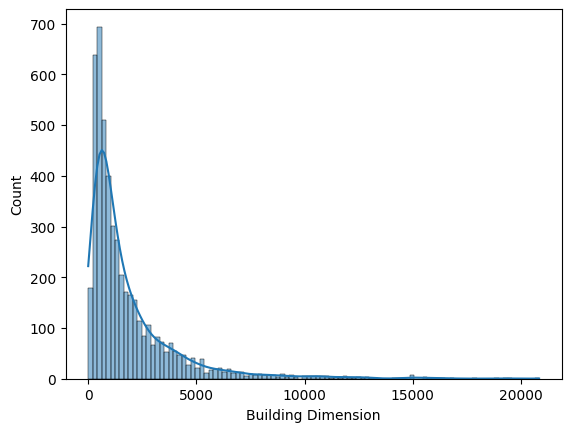

In [3207]:
sns.histplot(df_assurance['Building Dimension'], kde=True)
plt.show()

Copie du DataFrame pour visualiser le heatmap

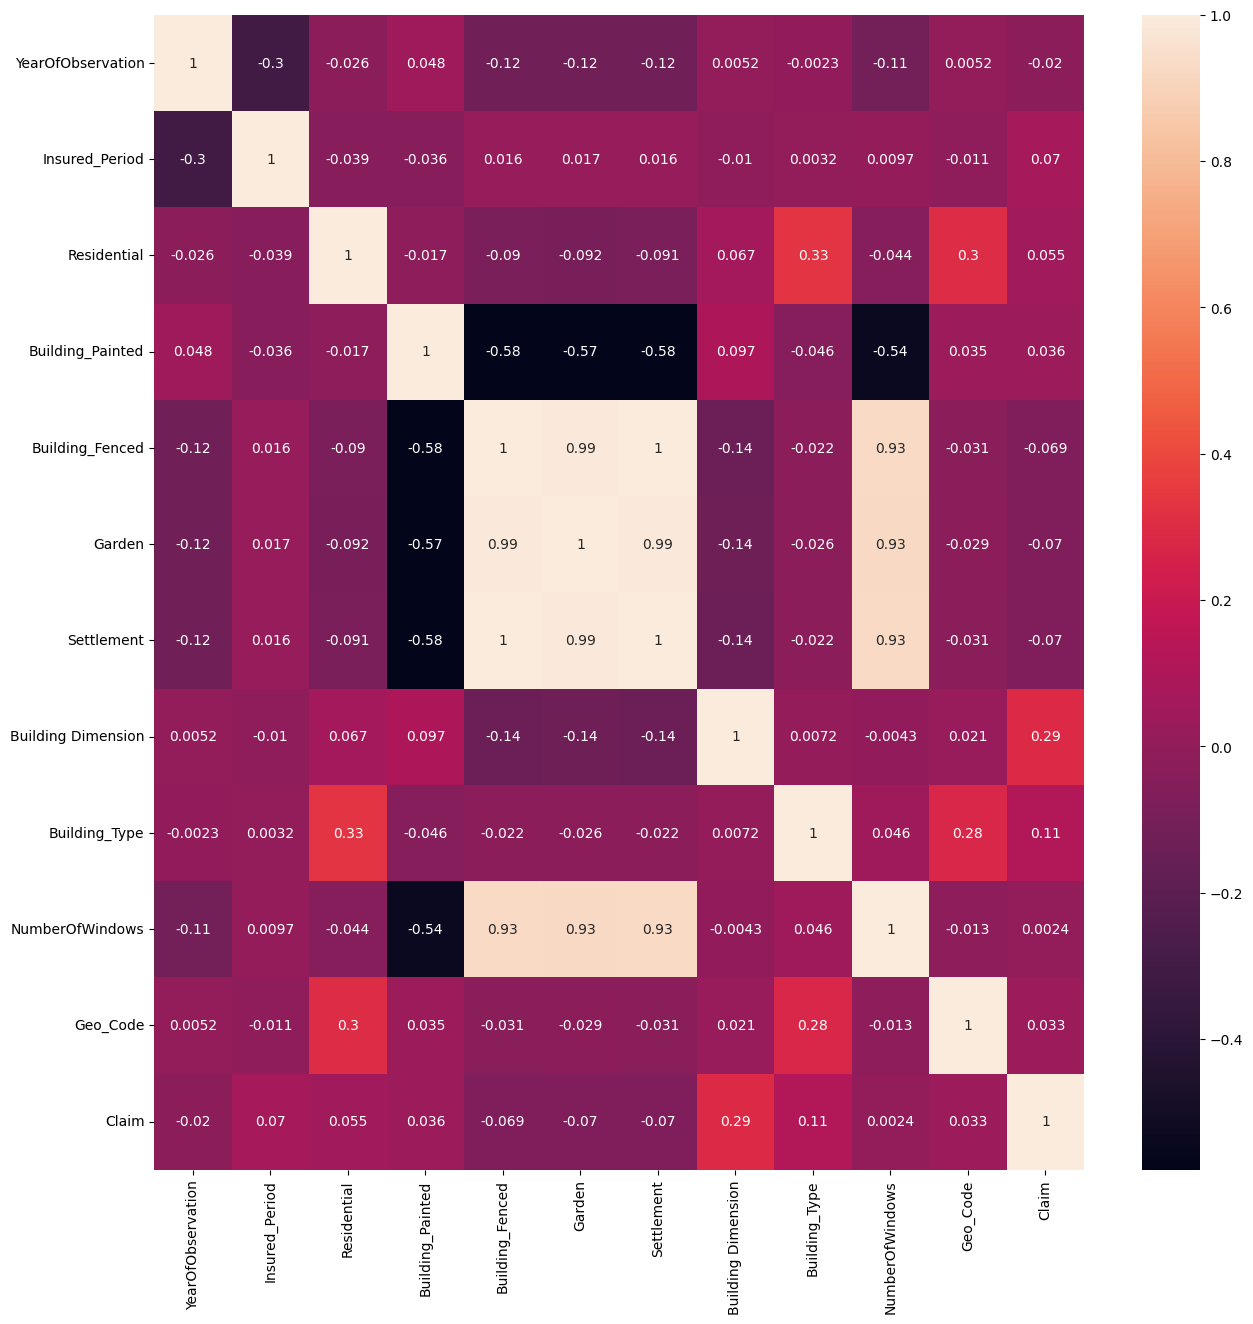

In [3208]:
df_assurance_copie=pd.DataFrame(df_assurance)
for col in df_assurance_copie.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    df_assurance_copie[col] = encoder.fit_transform(df_assurance_copie[col])
plt.figure(figsize=(15, 15))  
sns.heatmap(df_assurance_copie.iloc[:,1:].corr(), annot=True)
plt.show()

#d'après ce graphique, on remarque que : 
#(Garden,settlement),(Garden,Building_Fenced),(NumberOfWindows,Garden),(NumberOfWindows,settlement),(NumberOfWindows,Building_Fenced)

4/ Detection des anomalies

<Axes: xlabel='Building Dimension'>

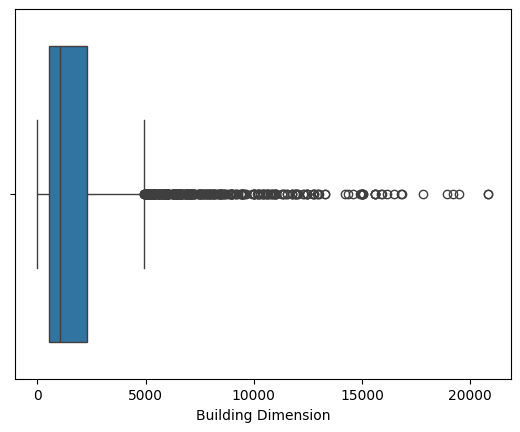

In [3209]:
sns.boxplot(data=df_assurance, x='Building Dimension')

5/ Identification des valeurs manquantes NaN

In [3210]:
df_assurance.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

6/ Détection des lignes dupliquées

In [3211]:
df_assurance.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5007    False
5008    False
5009    False
5010    False
5011    False
Length: 5012, dtype: bool

***|| . Data Pré-Processing***

1/ Nettoyage des données

a- Traitement des NaN: Geo_Code et Garden

In [3212]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_assurance[['Garden']]=mf_imputer.fit_transform(df_assurance.loc[:,['Garden']])

In [3213]:
df_assurance['Geo_Code'].ffill(inplace=True)


C:\Users\sirin\AppData\Local\Temp\ipykernel_8348\1935273107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_assurance['Geo_Code'].ffill(inplace=True)


In [3214]:
# EwD=KBinsDiscretizer(n_bins=4,encode='ordinal', strategy='quantile',subsample=len(df_assurance))
# df_assurance['NumberOfWindows']=EwD.fit_transform(df_assurance.loc[:,['NumberOfWindows']])

2/ Transformation des données

a- Changement des valeurs dans la colonne NumberOfWindows

In [3215]:
df_assurance['NumberOfWindows']=np.where(df_assurance['NumberOfWindows']==">=10",10,df_assurance['NumberOfWindows'])
df_assurance['NumberOfWindows']=np.where(df_assurance['NumberOfWindows']=="without",0,df_assurance['NumberOfWindows'])
df_assurance["NumberOfWindows"]=df_assurance["NumberOfWindows"].astype("int32")

b-Normaliser les valeurs de : YearOfObservation,Building_Painted,Building_Fenced,Settlement,Building_Type,Garden

In [3216]:
ct = ColumnTransformer(
    [
        ('encoder_1', OneHotEncoder(categories=[['2012', '2013', '2014', '2015', '2016']]), ["YearOfObservation"]),
        ('encoder_2', OrdinalEncoder(), ["Building_Painted"]),  
        ('encoder_3', OrdinalEncoder(), ["Building_Fenced"]),  
        ('encoder_4', OrdinalEncoder(), ["Settlement"]),  
        ('encoder_5', OneHotEncoder(categories=[['Wood-framed', 'Non-combustible', 'Ordinary', 'Fire-resistive']]), ["Building_Type"]),
        ('encoder_6', OrdinalEncoder(), ["Garden"]),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

arr = ct.fit_transform(df_assurance)

final_columns = ct.get_feature_names_out()

df_assurance = pd.DataFrame(arr, columns=final_columns)

df_assurance.columns = [col.replace("Building_Type_", "") for col in df_assurance.columns]
df_assurance.columns = [col.replace("YearOfObservation_", "") for col in df_assurance.columns]

# encoded_columns = [col for col in df_assurance.columns if "Wood-framed" in col or "Non-combustible" in col or "Ordinary" in col or "Fire-resistive" in col or "2012" in col or "2013" in col or "2014" in col or "2015" in col or "2016" in col or "Building_Painted" in col or "Building_Fenced" in col or "Settlement" in col ]
# df_assurance[encoded_columns] = df_assurance[encoded_columns].astype("Int32")
df_assurance


,2012,2013,2014,2015,2016,Building_Painted,Building_Fenced,Settlement,Wood-framed,Non-combustible,Ordinary,Fire-resistive,Garden,Customer Id,Insured_Period,Residential,Building Dimension,NumberOfWindows,Geo_Code,Claim
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,H13501,1.0,1,1240.0,0,75117,non
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,H14962,1.0,0,900.0,0,62916,non
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,H17755,1.0,1,4984.0,4,31149,oui
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,H13369,0.5,0,600.0,0,6012,oui
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,H12988,1.0,0,900.0,0,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,H13682,1.0,0,550.0,0,33063,oui
5008,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,H18342,0.5,0,1000.0,4,13004,non
5009,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,H16892,1.0,1,480.0,3,94059,non
5010,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,H18805,0.5,0,536.0,4,74243,non


In [3217]:
df_assurance=pd.concat([df_assurance[["Customer Id"]],df_assurance.drop(labels=["Customer Id"],axis=1)],axis=1)
df_assurance

,Customer Id,2012,2013,2014,2015,2016,Building_Painted,Building_Fenced,Settlement,Wood-framed,Non-combustible,Ordinary,Fire-resistive,Garden,Insured_Period,Residential,Building Dimension,NumberOfWindows,Geo_Code,Claim
0,H13501,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1240.0,0,75117,non
1,H14962,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0,900.0,0,62916,non
2,H17755,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,4984.0,4,31149,oui
3,H13369,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,0,600.0,0,6012,oui
4,H12988,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0,900.0,0,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0,550.0,0,33063,oui
5008,H18342,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0,1000.0,4,13004,non
5009,H16892,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,480.0,3,94059,non
5010,H18805,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0,536.0,4,74243,non


C- Transformation de Building Dimension

[2004.30086815 2004.30086815 2004.30086815 2004.30086815 2004.30086815
 2004.30086815 2004.30086815 2004.30086815 2004.30086815 2004.30086815
 2004.30086815 2004.30086815 2004.30086815 2004.30086815 2004.30086815
 2004.30086815 2004.30086815 2004.30086815 2004.30086815 2004.30086815
 2004.30086815 2004.30086815 2004.30086815 2004.30086815 2004.30086815
 2004.30086815 2004.30086815 2004.30086815 2004.30086815 2004.30086815
 2004.30086815 2004.30086815 2004.30086815 2004.30086815 2004.30086815
 2004.30086815 2004.30086815 2004.30086815 2004.30086815 2004.30086815
 2004.30086815 2004.30086815 2004.30086815 2004.30086815 2004.30086815
 2004.30086815 2004.30086815 2004.30086815 2004.30086815 2004.30086815
 2004.30086815 2004.30086815 2004.30086815 2004.30086815 2004.30086815
 2004.30086815 2004.30086815 2004.30086815 2004.30086815 2004.30086815
 2004.30086815 2004.30086815 2004.30086815 2004.30086815 2004.30086815
 2004.30086815 2004.30086815 2004.30086815 2004.30086815 2004.30086815
 2004.

ValueError: x and y must have same first dimension, but have shapes (4935, 1) and (1,)

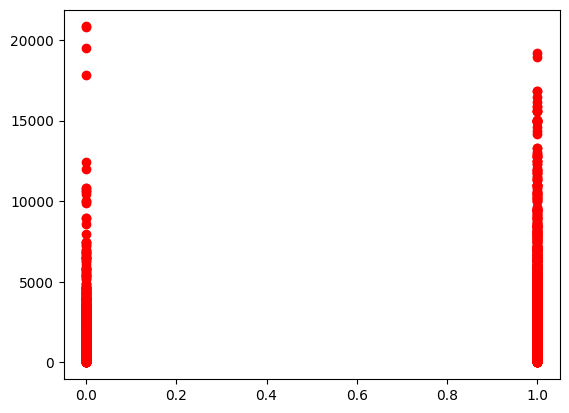

In [ ]:
#(Garden,settlement),(Garden,Building_Fenced),(NumberOfWindows,Garden),(NumberOfWindows,settlement),(NumberOfWindows,Building_Fenced)
# def TransferNaN(col,classe):
#     s_df=df_assurance.dropna(subset=[col])
#     X=s_df.loc[:,[classe]].values
#     Y=s_df.loc[:,col].values
#     model=LinearRegression()
#     model.fit(X,Y)
#     list_m=df_assurance[df_assurance[col].isnull()].index.tolist()
#     val_p= model.predict(df_assurance.loc[list_m,[classe]].values)
#     print(val_p)
#     df_assurance.loc[list_m,[col]]=val_p

# TransferNaN('Building Dimension','Building_Painted') 


d- Normalisation de Building Dimension

In [3176]:
standard_scaler= RobustScaler()
arr= standard_scaler.fit_transform(df_assurance[["Building Dimension"]])
pd.DataFrame(arr,columns=["Building Dimension"])

,Building Dimension
0,0.081395
1,-0.116279
2,2.258140
3,-0.290698
4,-0.116279
...,...
5007,-0.319767
5008,-0.058140
5009,-0.360465
5010,-0.327907


<Axes: xlabel='Building Dimension', ylabel='Density'>

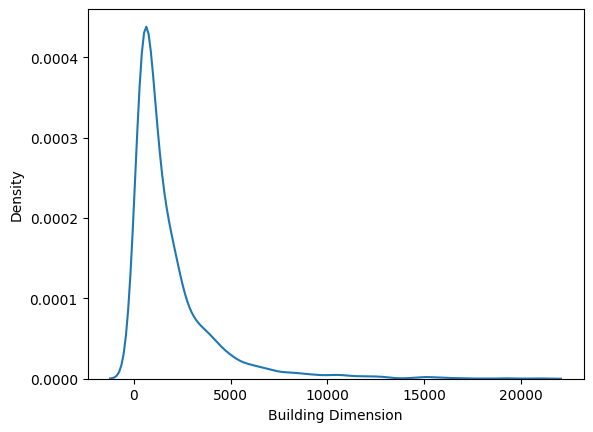

In [ ]:
sns.kdeplot(df_assurance['Building Dimension'],bw_method='scott',bw_adjust=1)

<Axes: ylabel='Density'>

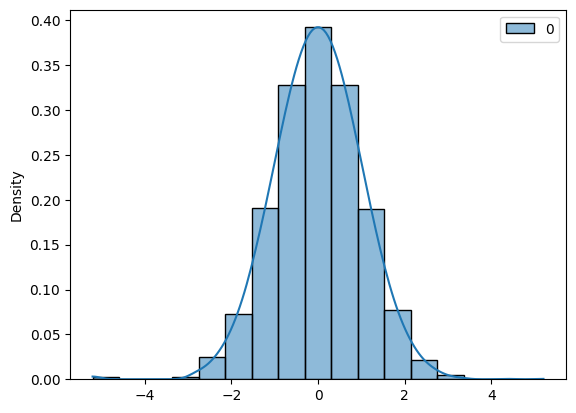

In [ ]:
transformer = QuantileTransformer(output_distribution='normal') #ou 'uniform'
arr = transformer.fit_transform(df_assurance[["Building Dimension"]])
sns.histplot(arr, bins=17, kde=True, stat='density')

In [3179]:
df_assurance=df_assurance.iloc[:,1:]
df_assurance1=df_assurance[df_assurance.duplicated()]
df_assurance1
df_assurance.drop_duplicates(inplace=True,ignore_index=True)
df_assurance

,2012,2013,2014,2015,2016,Building_Painted,Building_Fenced,Settlement,Wood-framed,Non-combustible,Ordinary,Fire-resistive,Garden,Insured_Period,Residential,Building Dimension,NumberOfWindows,Geo_Code,Claim
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1240.0,0,75117,non
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0,900.0,0,62916,non
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,4984.0,4,31149,oui
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,0,600.0,0,6012,oui
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0,900.0,0,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0,550.0,0,33063,oui
4998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0,1000.0,4,13004,non
4999,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,480.0,3,94059,non
5000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0,536.0,4,74243,non


In [3180]:
df_assurance

,2012,2013,2014,2015,2016,Building_Painted,Building_Fenced,Settlement,Wood-framed,Non-combustible,Ordinary,Fire-resistive,Garden,Insured_Period,Residential,Building Dimension,NumberOfWindows,Geo_Code,Claim
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1240.0,0,75117,non
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0,900.0,0,62916,non
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,4984.0,4,31149,oui
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,0,600.0,0,6012,oui
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0,900.0,0,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0,550.0,0,33063,oui
4998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0,1000.0,4,13004,non
4999,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,480.0,3,94059,non
5000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0,536.0,4,74243,non
